In [4]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()

In [ ]:
df_DS['job_posted_month_no'] = df_DS['job_posted_date'].dt.month

df_DS_explode = df_DS.explode('job_skills')

df_DS_pivot = df_DS_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

In [ ]:
df_DS_pivot.loc['Total'] = df_DS_pivot.sum()
# creates a new row on the index called 'Total' then sums up all the values to fill out the total row

df_DS_pivot.loc['Total'].sort_values(ascending=False).index
# this sorts the data in descending order

df_DS_pivot = df_DS_pivot[df_DS_pivot.loc['Total'].sort_values(ascending=False).index]
# we then pass that thtrough the df__DS_pivot to have the pivot table sorted properly

df_DS_pivot = df_DS_pivot.drop('Total')
# the 'Total' row has served its purpose and is no longer needed. so, we are dropping it

df_DS_pivot

job_skills,python,sql,r,sas,tableau,aws,spark,azure,tensorflow,excel,...,huggingface,fastify,esquisse,workfront,play framework,nuxt.js,mattermost,shogun,sqlserver,wimi
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,13998,9811,7566,3842,3446,3253,3222,2582,2316,2132,...,0,0,0,0,0,0,0,0,0,0
2,9551,6600,5064,2644,2566,2089,2085,1716,1525,1453,...,0,0,1,0,0,0,0,0,0,0
3,9210,6374,4971,2480,2456,2092,1992,1727,1405,1440,...,0,0,0,1,0,0,0,1,0,0
4,9135,6270,4873,2444,2447,2055,1905,1665,1546,1456,...,0,2,0,0,0,0,0,0,0,0
5,8029,5583,4228,2244,2271,1921,1716,1442,1271,1202,...,0,0,0,0,0,0,0,0,0,0
6,9338,6473,5019,2282,2432,2173,2072,1739,1580,1324,...,0,1,1,0,0,0,0,0,0,0
7,9400,6678,5029,2300,2547,2207,1972,1845,1535,1425,...,1,0,0,0,0,0,0,0,0,0
8,11193,8026,6089,3100,3013,2571,2466,2130,1972,1795,...,0,0,0,0,1,0,0,0,0,0
9,8393,5748,4153,2224,2062,1923,1820,1704,1462,1352,...,3,0,0,0,0,0,0,0,0,0


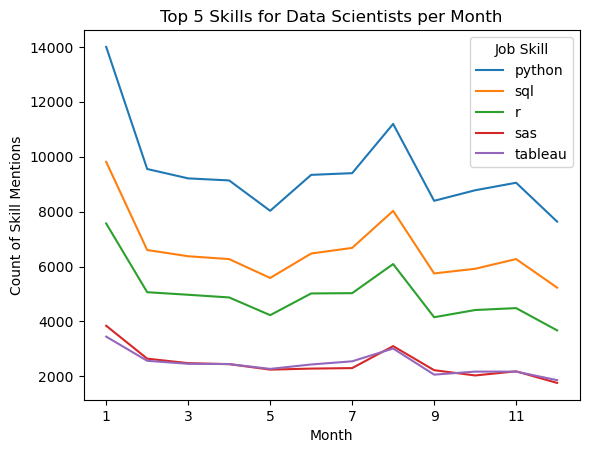

In [ ]:
df_DS_pivot.iloc[:, :5].plot(kind='line') # using iloc to specify that we want all the rows and the top 5 skills by using the index
plt.xlabel('Month')
plt.ylabel('Count of Skill Mentions')
plt.legend(title='Job Skill')
plt.title('Top 5 Skills for Data Scientists per Month')
plt.show()

